데이터 불러오기

In [25]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

msno(사용자 아이디) => 숫자로 변환(정수형)
is churn (타겟 데이터)
is back (재가입)
-- 처음 가입한 고객은 : 0
-- 현재 재가입시 : 1
payment_plan_sum (아이디 별 총 구독 기간)
plan_list_price (아이디 별 합산)
actual_amount_paid (아이디 별 합산)


아이디별 평균 할인률 (5,6번 컬럼 이용)
is_auto_renew (자동 갱신 비율)
9.membership_expire_date(아이디별 가장 마지막 날짜)
is_cancle (비율)
거래 횟수 (아이디별 count)
도시
bd = age (이상치 전처리 필요)
성별
registered_via : 등록 방법
registration_init_time (가입 날짜로 추정됨)
17.

로그 데이터 (사용자별)
아이디별 가장 오래된 날짜
아이디별 가장 최근 날짜
num_25 평균
num_50 평균
num_75 평균
num_985 평균
num_100 평균
num_unq 평균
total_secs 평균
사용자별 로그가 찍힌 횟수

결측값 처리 (at least)
이상치 처리 (at least)
eda

In [26]:
data_dir = 'D:\\study\\sknetworks\\team_project\\sk_2nd\\data\\'
df = pd.read_csv(data_dir + "kkbox_data_not_log.csv")
df.head(3)

,msno_num,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count
0,2,1,0,NaN,7,20110914,0,0,870,3981,4130,0.0,1.0,20170428,0.033333,30
1,6,4,30,male,9,20110916,0,0,603,2980,3129,0.0,1.0,20170517,0.000000,21
2,8,5,34,male,9,20110916,1,0,360,1072,1072,0.0,0.0,20170823,0.000000,2


6   is_churn  (타겟 데이터)

7   is_back (재가입)

8   payment_plan_sum (아이디 별 총 구독 기간)

9   plan_list_price (아이디 별 예상 지불 금액)

10  actual_amount_paid (아이디 별 실제 지불 금액)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961431 entries, 0 to 961430
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno_num                961431 non-null  int64  
 1   city                    961431 non-null  int64  
 2   bd                      961431 non-null  int64  
 3   gender                  442069 non-null  object 
 4   registered_via          961431 non-null  int64  
 5   registration_init_time  961431 non-null  int64  
 6   is_churn                961431 non-null  int64  
 7   is_back                 961431 non-null  int64  
 8   payment_plan_sum        961431 non-null  int64  
 9   plan_list_price         961431 non-null  int64  
 10  actual_amount_paid      961431 non-null  int64  
 11  discount_rate           960376 non-null  float64
 12  is_auto_renew           961431 non-null  float64
 13  membership_expire_date  961431 non-null  int64  
 14  is_cancel           

In [28]:
df.describe()

,msno_num,city,bd,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count
count,9.614310e+05,961431.000000,961431.000000,961431.000000,9.614310e+05,961431.000000,961431.000000,961431.000000,961431.000000,961431.000000,960376.000000,961431.000000,9.614310e+05,961431.000000,961431.000000
mean,3.274926e+06,6.005729,13.737391,6.854863,2.013291e+07,0.129195,0.005478,508.627384,2284.583762,2356.995127,0.007319,0.822293,2.017061e+07,0.017632,16.538535
std,1.987743e+06,6.458137,19.922899,1.980482,2.989397e+04,0.335416,0.073813,252.897013,1258.969534,1315.723316,0.036825,0.361621,1.445010e+03,0.041740,8.979407
min,2.000000e+00,1.000000,-3152.000000,3.000000,2.004033e+07,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007937,0.000000,2.017020e+07,0.000000,1.000000
25%,1.512220e+06,1.000000,0.000000,7.000000,2.012023e+07,0.000000,0.000000,300.000000,1260.000000,1222.000000,0.000000,0.966667,2.017041e+07,0.000000,9.000000
50%,3.215338e+06,1.000000,0.000000,7.000000,2.014062e+07,0.000000,0.000000,510.000000,2235.000000,2235.000000,0.000000,1.000000,2.017042e+07,0.000000,17.000000
75%,5.014526e+06,13.000000,27.000000,9.000000,2.016012e+07,0.000000,0.000000,750.000000,3421.000000,3483.000000,0.000000,1.000000,2.017043e+07,0.032258,24.000000
max,6.769470e+06,22.000000,2016.000000,13.000000,2.017042e+07,1.000000,1.000000,3550.000000,17433.000000,17433.000000,1.000000,1.000000,2.025100e+07,1.000000,244.000000


In [29]:
df.columns

Index(['msno_num', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'is_churn', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'membership_expire_date', 'is_cancel',
       'transaction_count'],
      dtype='object')

In [30]:
df['gender'].value_counts()

gender
male      232722
female    209347
Name: count, dtype: int64

In [31]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'female'else (0 if x == 'male' else x))
df['gender'].value_counts()

gender
0.0    232722
1.0    209347
Name: count, dtype: int64

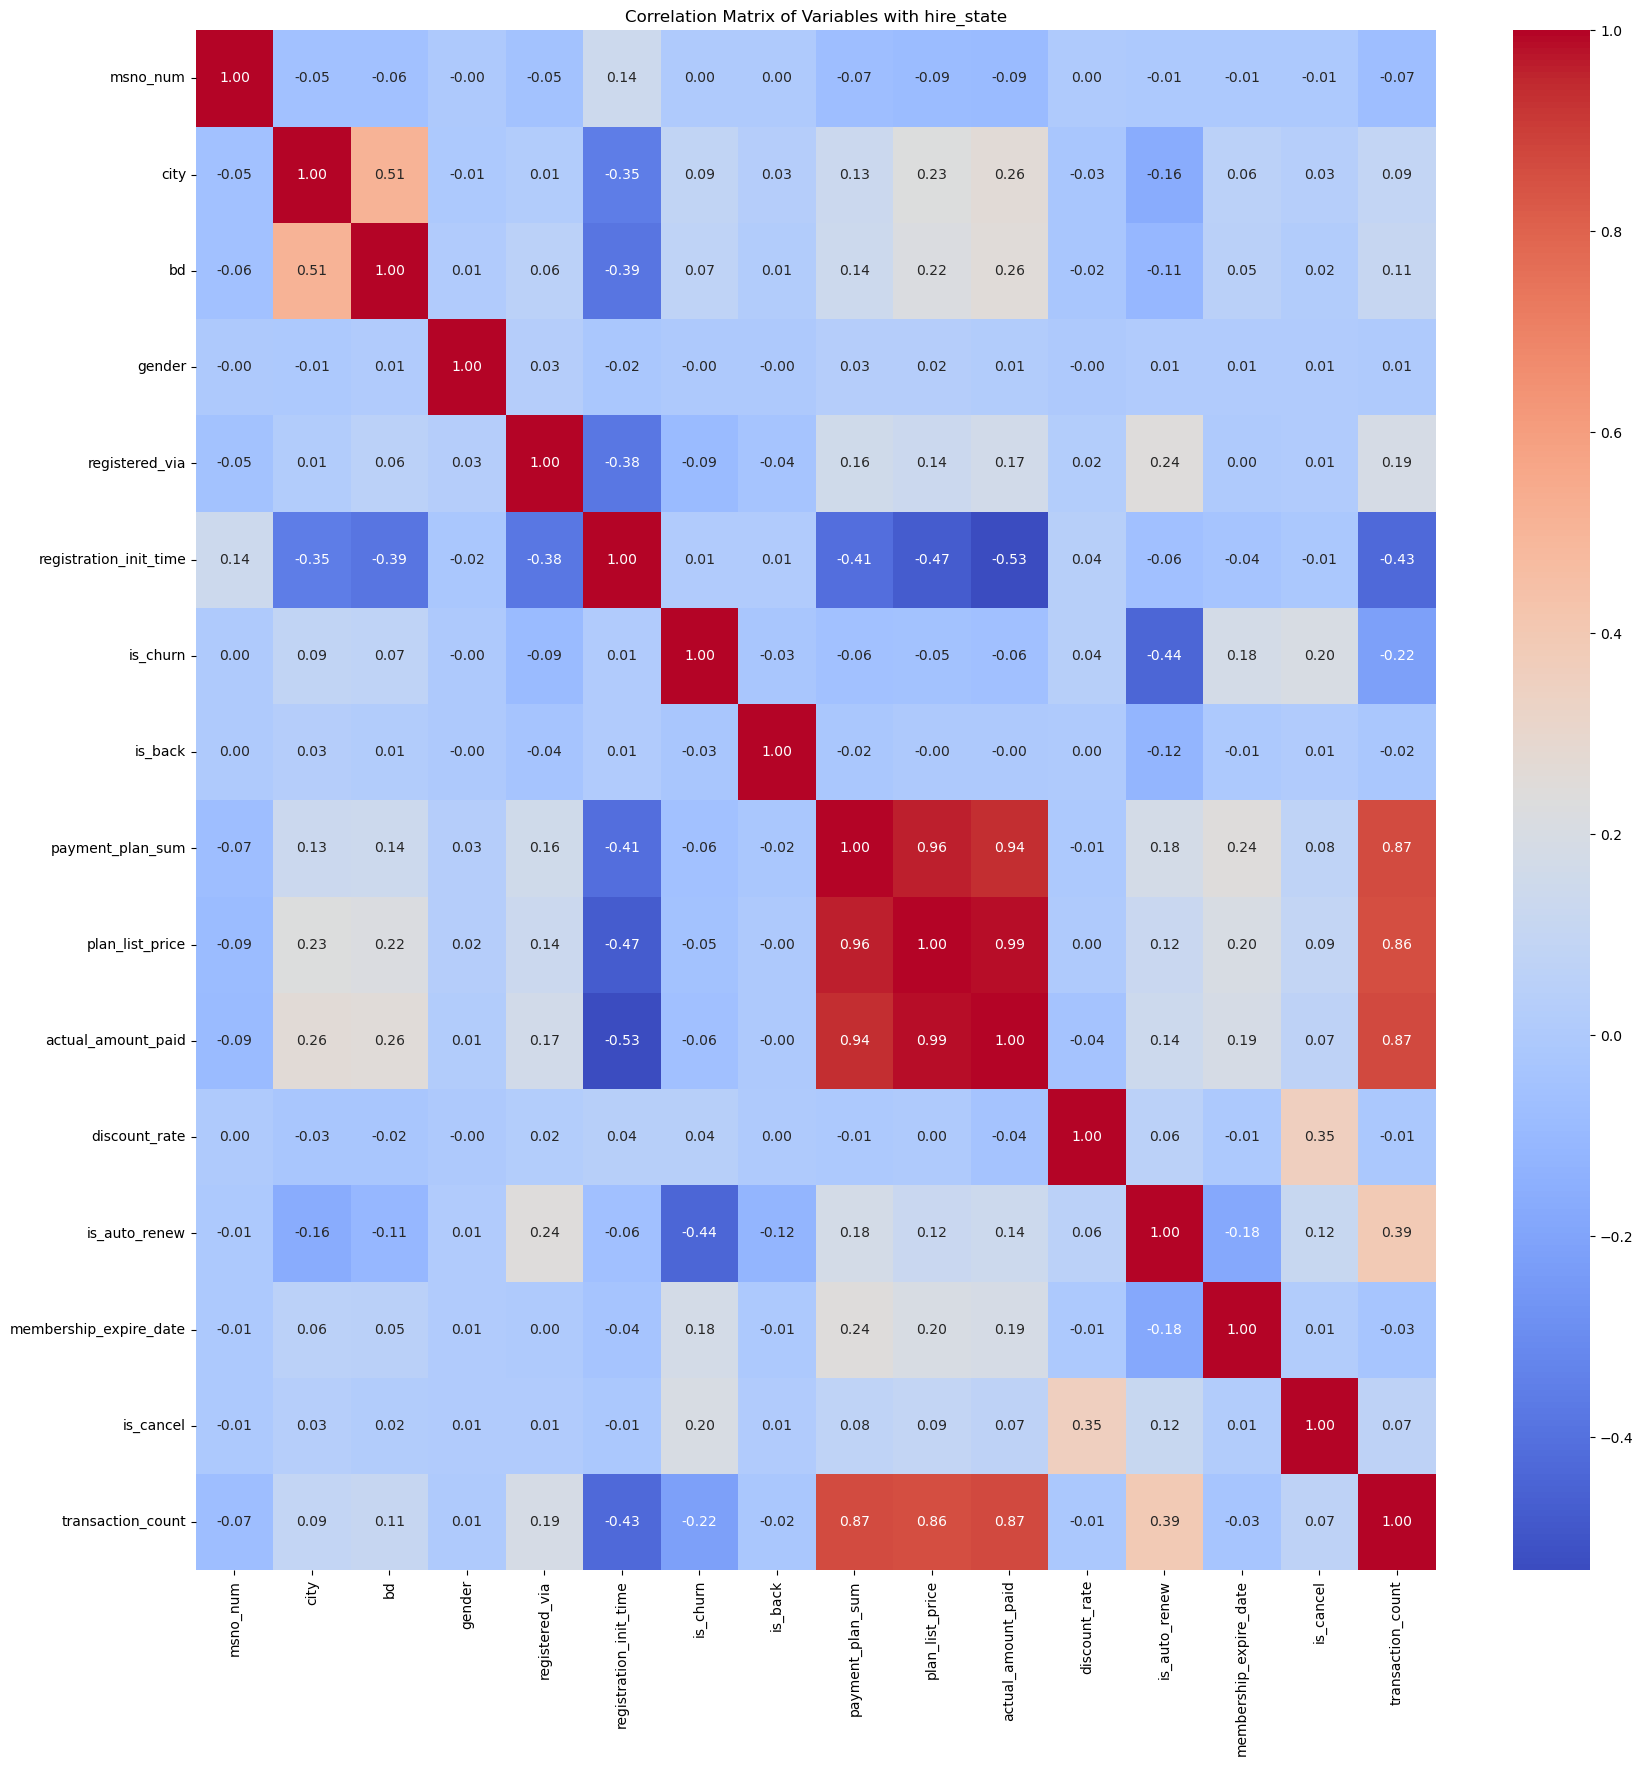

In [33]:
# 상관관계 분석에 사용할 변수들을 선택합니다.
corr_cols = ['msno_num', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'is_churn', 'is_back', 'payment_plan_sum',
       'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'membership_expire_date', 'is_cancel',
       'transaction_count']

# 선택한 변수들 간의 상관관계를 계산합니다.
corr_matrix = df[corr_cols].corr()

# 히트맵을 그립니다.
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables with hire_state')
plt.show()

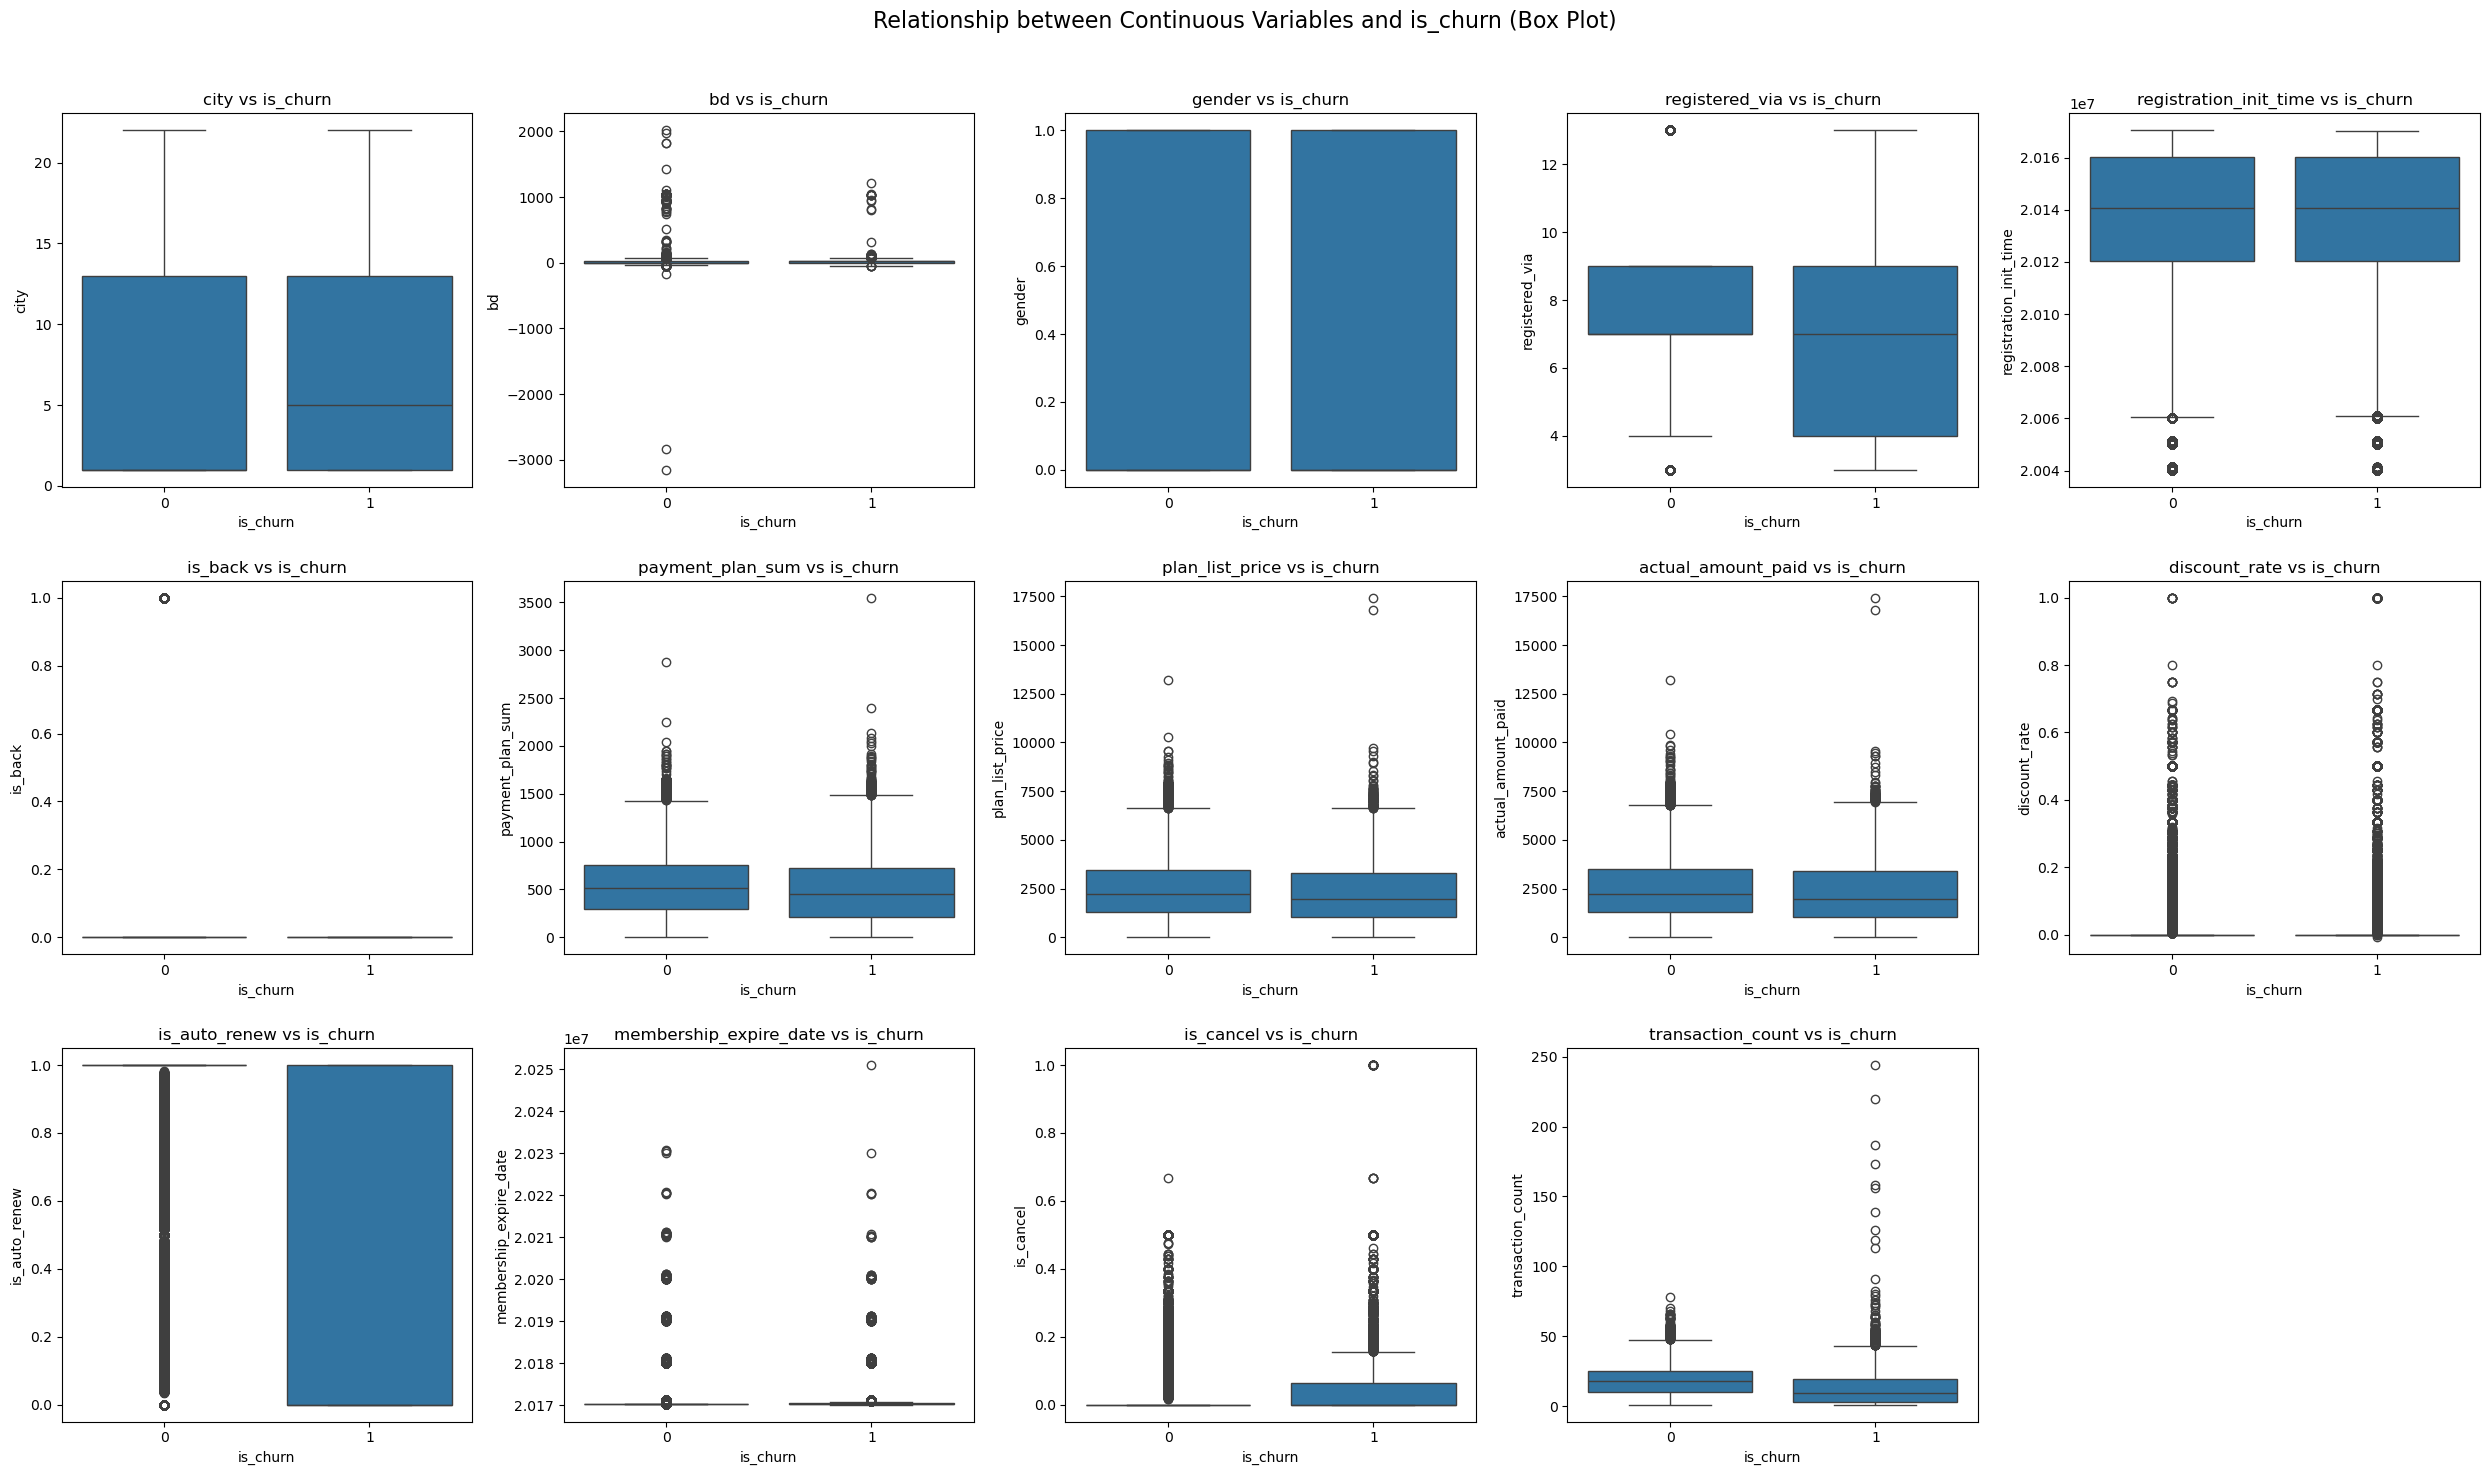

In [34]:
# 연속형 변수 목록
continuous_cols = ['city', 'bd', 'gender', 'registered_via', 'registration_init_time', 
        'is_back', 'payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'membership_expire_date', 'is_cancel', 'transaction_count']

num_vars = len(continuous_cols)
cols = 5  # 서브플롯의 열 개수
rows = math.ceil(num_vars / cols)  # 필요한 행 개수

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and is_churn (Box Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    sns.boxplot(x='is_churn', y=col, data=df, ax=ax)
    ax.set_title(f'{col} vs is_churn')
    ax.set_xlabel('is_churn')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

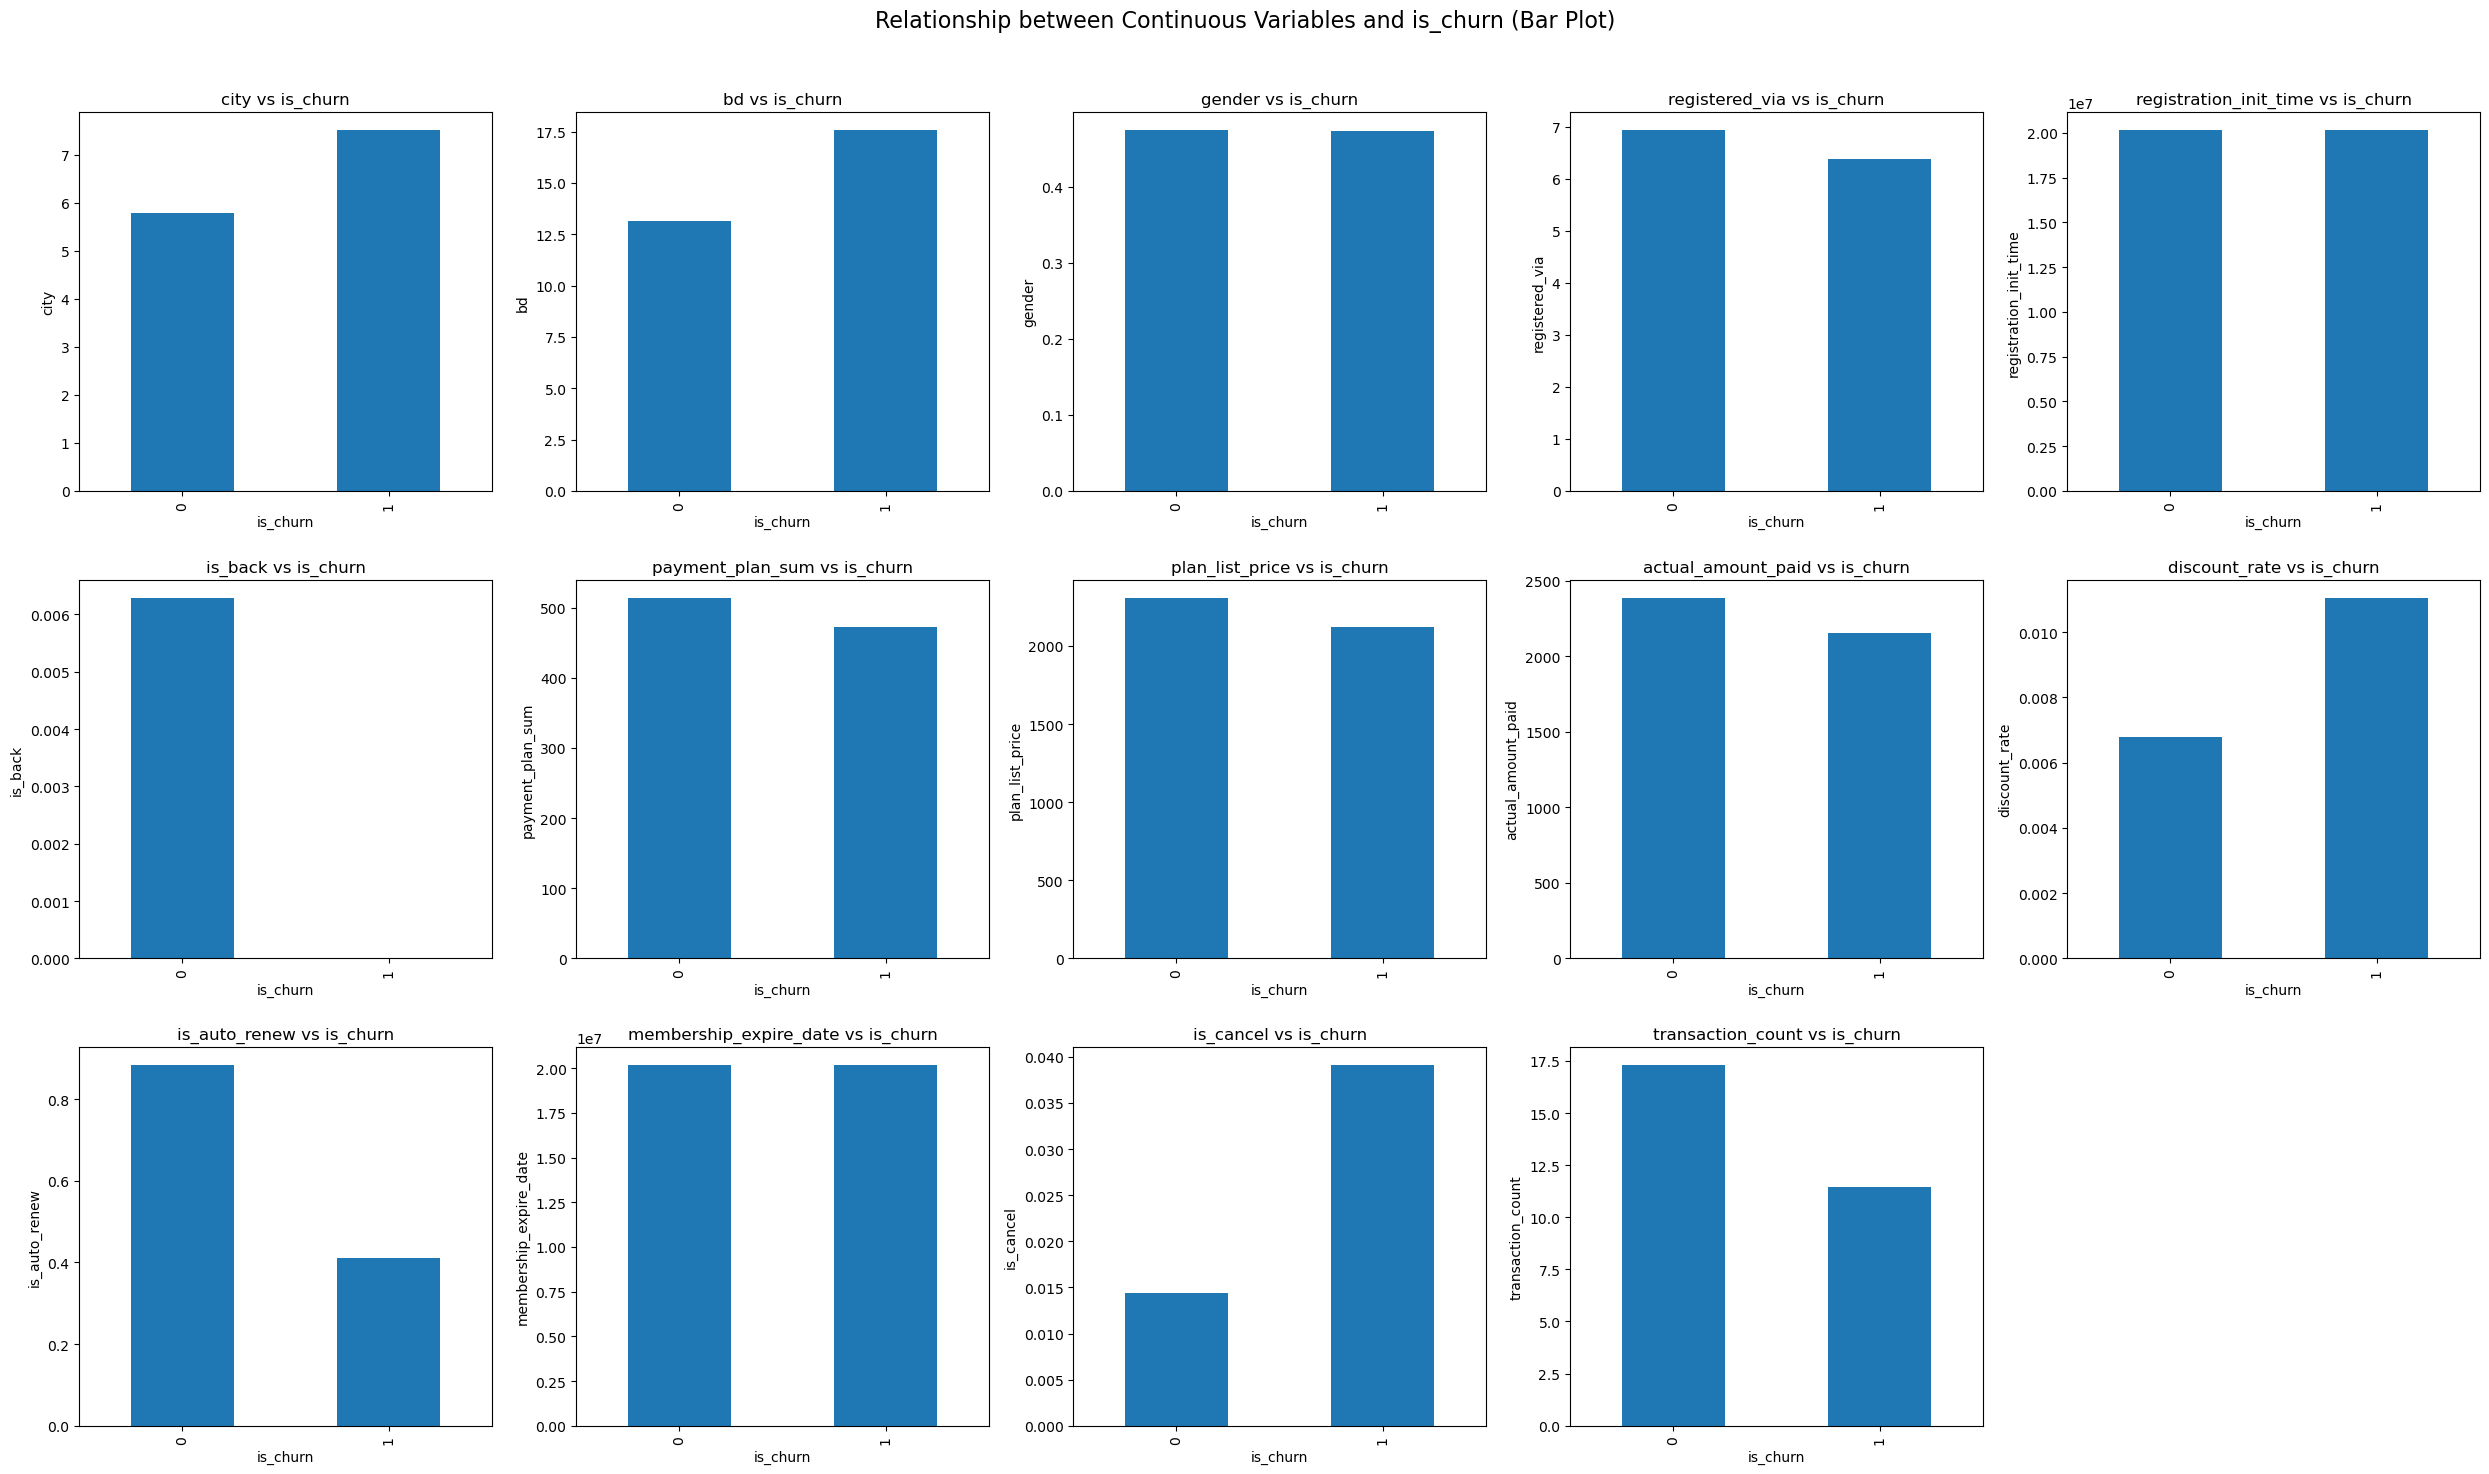

In [35]:
# 연속형 변수와 is_churn 변수 간의 관계를 막대 그래프로 시각화
continuous_cols = ['city', 'bd', 'gender', 'registered_via', 'registration_init_time', 
        'is_back', 'payment_plan_sum', 'plan_list_price', 'actual_amount_paid', 'discount_rate',
       'is_auto_renew', 'membership_expire_date', 'is_cancel', 'transaction_count']

fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
fig.suptitle("Relationship between Continuous Variables and is_churn (Bar Plot)", fontsize=16)

for i, col in enumerate(continuous_cols):
    row, col_idx = divmod(i, cols)  # 현재 변수의 행, 열 인덱스 계산
    ax = axes[row, col_idx] if rows > 1 else axes[col_idx]  # 행이 1개일 경우 처리
    
    df.groupby('is_churn')[col].mean().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} vs is_churn')
    ax.set_xlabel('is_churn')
    ax.set_ylabel(col)

# 남은 빈 서브플롯 제거
for j in range(i + 1, rows * cols):
    row, col_idx = divmod(j, cols)
    fig.delaxes(axes[row, col_idx])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [37]:
df['is_churn'].value_counts()

is_churn
0    837219
1    124212
Name: count, dtype: int64

In [38]:
df['is_back'].value_counts()

is_back
0    956164
1      5267
Name: count, dtype: int64

In [39]:
df['payment_plan_sum'].value_counts()

payment_plan_sum
510     73007
780     48602
603     43010
810     39930
300     33398
        ...  
1607        1
1391        1
1627        1
216         1
1359        1
Name: count, Length: 1379, dtype: int64

In [45]:
df['plan_list_price'].value_counts().sort_index()

plan_list_price
0        1055
1          22
35         16
50          1
70          7
         ... 
9705        1
10275       1
13186       1
16800       1
17433       1
Name: count, Length: 5378, dtype: int64

In [48]:
aa = df[df['plan_list_price'] == 0]
aa['is_churn'].value_counts()

is_churn
1    1044
0      11
Name: count, dtype: int64

In [44]:
df['actual_amount_paid'].value_counts().sort_index()

actual_amount_paid
0        1126
1          22
35         16
50          1
70          7
         ... 
9872        1
10452       1
13186       1
16800       1
17433       1
Name: count, Length: 5506, dtype: int64